In [1]:
import os
import numpy as np
import cartopy.crs as ccrs
import easygems.healpix as egh
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import colormaps as cmaps
from colormaps.utils import concat
from matplotlib.colors import ListedColormap
mpl.rcParams['figure.dpi'] = 72

# Testing HEALPix SCREAM 3H Data

This notebook tests reading and visualizing HEALPix SCREAM 3H data.

In [6]:
in_dir = '/pscratch/sd/w/wcmca1/hackathon/healpix/scream_cess2/'
in_file = f'{in_dir}SCREAMv1_ne120_INSTANT_3H_zoom8_20190810_20190811.zarr'
print(f"{in_file} exists: {os.path.exists(in_file)}")

# # Also check if zoom 8 exists for comparison
# zoom8_file = f'{in_dir}SCREAMv1_1H_zoom8_20190801_20190802.zarr'
# print(f"Zoom 8 file exists: {os.path.exists(zoom8_file)}")

/pscratch/sd/w/wcmca1/hackathon/healpix/scream_cess2/SCREAMv1_ne120_INSTANT_3H_zoom8_20190810_20190811.zarr exists: True


In [34]:
# Read data
ds = xr.open_zarr(in_file)
ds = ds.pipe(egh.attach_coords)
ds 

<xarray.Dataset> Size: 16GB
Dimensions:   (time: 17, cell: 786432, lev: 37)
Coordinates:
  * time      (time) datetime64[ns] 136B 2019-08-10 ... 2019-08-12
    crs       int64 8B 0
  * cell      (cell) int32 3MB 0 1 2 3 4 ... 786427 786428 786429 786430 786431
    lat       (cell) float64 6MB 0.1492 0.2984 0.2984 ... -0.2984 -0.1492
    lon       (cell) float64 6MB 45.0 45.18 44.82 45.0 ... 315.2 314.8 315.0
Dimensions without coordinates: lev
Data variables: (12/18)
    hur       (time, cell, lev) float32 2GB dask.array<chunksize=(17, 262144, 37), meta=np.ndarray>
    hus       (time, cell, lev) float32 2GB dask.array<chunksize=(17, 262144, 37), meta=np.ndarray>
    huss      (time, cell) float32 53MB dask.array<chunksize=(17, 262144), meta=np.ndarray>
    omega     (time, cell, lev) float32 2GB dask.array<chunksize=(17, 262144, 37), meta=np.ndarray>
    omega500  (time, cell) float32 53MB dask.array<chunksize=(17, 262144), meta=np.ndarray>
    p         (time, cell, lev) float32 2GB dask.array<chunksize=(17, 262144, 37), meta=np.ndarray>
    ...        ...
    ua        (time, cell, lev) float32 2GB dask.array<chunksize=(17, 262144, 37), meta=np.ndarray>
    uivt      (time, cell) float32 53MB dask.array<chunksize=(17, 262144), meta=np.ndarray>
    va        (time, cell, lev) float32 2GB dask.array<chunksize=(17, 262144, 37), meta=np.ndarray>
    vivt      (time, cell) float32 53MB dask.array<chunksize=(17, 262144), meta=np.ndarray>
    z         (time, cell, lev) float32 2GB dask.array<chunksize=(17, 262144, 37), meta=np.ndarray>
    z500      (time, cell) float32 53MB dask.array<chunksize=(17, 262144), meta=np.ndarray>
Attributes:
    grid_mapping:      crs
    healpix_nest:      True
    healpix_npix:      786432
    healpix_nside:     256
    healpix_order:     8
    original_grid:     unstructured
    remapping_method:  delaunay_triangulation

In [8]:
ds.time.isel(time=slice(0, 24))

<xarray.DataArray 'time' (time: 17)> Size: 136B
array(['2019-08-10T00:00:00.000000000', '2019-08-10T03:00:00.000000000',
       '2019-08-10T06:00:00.000000000', '2019-08-10T09:00:00.000000000',
       '2019-08-10T12:00:00.000000000', '2019-08-10T15:00:00.000000000',
       '2019-08-10T18:00:00.000000000', '2019-08-10T21:00:00.000000000',
       '2019-08-11T00:00:00.000000000', '2019-08-11T03:00:00.000000000',
       '2019-08-11T06:00:00.000000000', '2019-08-11T09:00:00.000000000',
       '2019-08-11T12:00:00.000000000', '2019-08-11T15:00:00.000000000',
       '2019-08-11T18:00:00.000000000', '2019-08-11T21:00:00.000000000',
       '2019-08-12T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 136B 2019-08-10 ... 2019-08-12
    crs      int64 8B 0

In [16]:
# ds.time[-10:]
p_levs = ds.p_levs.compute()
p_levs

<xarray.DataArray 'p_levs' (lev: 37)> Size: 148B
array([   100.,    200.,    300.,    500.,    700.,   1000.,   2000.,
         3000.,   5000.,   7000.,  10000.,  12500.,  15000.,  17500.,
        20000.,  22500.,  25000.,  30000.,  35000.,  40000.,  45000.,
        50000.,  55000.,  60000.,  65000.,  70000.,  75000.,  77500.,
        80000.,  82500.,  85000.,  87500.,  90000.,  92500.,  95000.,
        97500., 100000.], dtype=float32)
Coordinates:
    crs      int64 8B 0
Dimensions without coordinates: lev
Attributes:
    cell_methods:   time: point
    long_name:      MISSING
    standard_name:  MISSING
    units:          Pa

In [13]:
# ds.time.dt.strftime('%Y')
ds.time.isel(time=0).dt.strftime('%Y-%m-%d %H:%M').item()

'2019-08-10 00:00'

In [14]:
ds.prw.attrs

{'cell_methods': 'time: point',
 'long_name': 'total water vapor path',
 'standard_name': 'atmosphere_mass_content_of_water_vapor',
 'units': 'kg/(m^2)'}

In [27]:
z_idx = np.argwhere(p_levs.values == 85000)[0][0]
ds.hus.sel(lev=z_idx)

<xarray.DataArray 'hus' (time: 17, cell: 786432)> Size: 53MB
dask.array<getitem, shape=(17, 786432), dtype=float32, chunksize=(17, 262144), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 136B 2019-08-10 ... 2019-08-12
    crs      int64 8B 0
  * cell     (cell) int32 3MB 0 1 2 3 4 5 ... 786427 786428 786429 786430 786431
    lat      (cell) float64 6MB 0.1492 0.2984 0.2984 ... -0.2984 -0.2984 -0.1492
    lon      (cell) float64 6MB 45.0 45.18 44.82 45.0 ... 315.2 314.8 315.0
Attributes:
    cell_methods:   time: point
    long_name:      water vapor mixing ratio
    standard_name:  humidity_mixing_ratio
    units:          kg/kg

<Figure size 460.8x345.6 with 0 Axes>

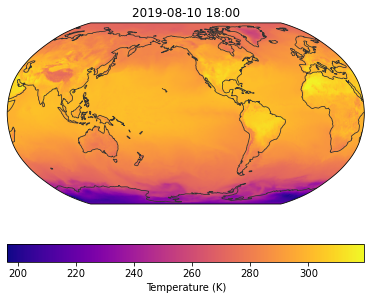

In [40]:
itime = 6
VAR = ds.tas.isel(time=itime)
im = egh.healpix_show(VAR, cmap='plasma')
time_str = ds.time.isel(time=itime).dt.strftime('%Y-%m-%d %H:%M').item()
plt.title(time_str)
plt.colorbar(im, orientation='horizontal', label=f'Temperature ({ds.tas.attrs["units"]})')

<Figure size 460.8x345.6 with 0 Axes>

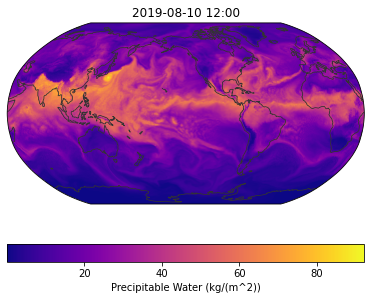

In [25]:
itime = 4
VAR = ds.prw.isel(time=itime)
im = egh.healpix_show(VAR.where(VAR > 0), cmap='plasma')
time_str = ds.time.isel(time=itime).dt.strftime('%Y-%m-%d %H:%M').item()
plt.title(time_str)
plt.colorbar(im, orientation='horizontal', label=f'Precipitable Water ({ds.prw.attrs["units"]})')

<Figure size 460.8x345.6 with 0 Axes>

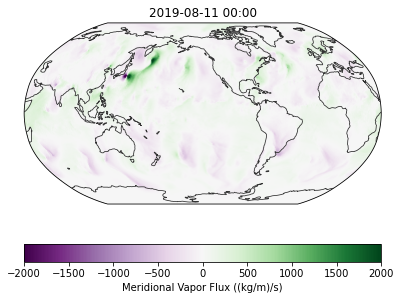

In [39]:
itime = 8
VAR = ds.vivt.isel(time=itime)
im = egh.healpix_show(VAR, vmin=-2000, vmax=2000, cmap='PRGn')
time_str = ds.time.isel(time=itime).dt.strftime('%Y-%m-%d %H:%M').item()
plt.title(time_str)
plt.colorbar(im, orientation='horizontal', label=f'Meridional Vapor Flux ({ds.vivt.attrs["units"]})')

<Figure size 460.8x345.6 with 0 Axes>

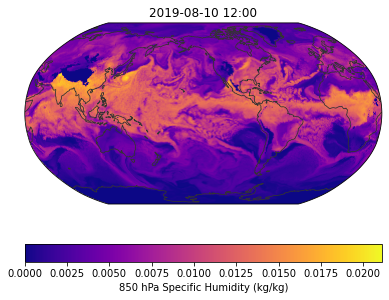

In [30]:
itime = 4
iplev = 85000
z_idx = np.argwhere(p_levs.values == iplev)[0][0]
ds.hus.sel(lev=z_idx)
VAR = ds.hus.isel(time=itime, lev=z_idx)
im = egh.healpix_show(VAR, cmap='plasma')
time_str = ds.time.isel(time=itime).dt.strftime('%Y-%m-%d %H:%M').item()
plt.title(time_str)
plt.colorbar(im, orientation='horizontal', label=f'{iplev/100:.0f} hPa Specific Humidity ({ds.hus.attrs["units"]})')

In [ ]:
# itime = 25
# fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(10, 8), subplot_kw={'projection': ccrs.Robinson(central_longitude=-137)})
# def egh_plot(data, ax, **kwargs):
#     ax.set_title(data.name)
#     ax.set_global()
#     im = egh.healpix_show(data, ax=ax, **kwargs)
#     plt.colorbar(im, ax=ax)
#     ax.coastlines()

# time_str = ds.time.isel(time=itime).dt.strftime('%Y-%m-%d %H:%M').item()
# pr = ds.pr.isel(time=itime) * 3600000  # Convert from mm/s to mm/h
# tb = olr_to_tb(ds.rlut.isel(time=itime))
# egh_plot(pr, ax=ax0, norm=mpl.colors.LogNorm(vmin=10e-2, vmax=30), cmap=cmaps.WhBlGrYeRe)
# egh_plot(tb, ax=ax1, cmap=cmap_tb, vmin=180, vmax=315)
# fig.suptitle(f"{time_str}", fontsize=16)

<Figure size 460.8x345.6 with 0 Axes>

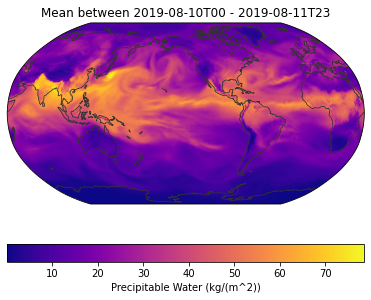

In [31]:
# time_str1 = '2020-01-01T00'
# time_str2 = '2020-01-02T23'
time_str1 = '2019-08-10T00'
time_str2 = '2019-08-11T23'
VAR = ds.prw.sel(time=slice(time_str1, time_str2))
VAR_avg = VAR.mean(dim='time')
im = egh.healpix_show(VAR_avg, cmap='plasma')
plt.title(f'Mean between {time_str1} - {time_str2}')
plt.colorbar(im, orientation='horizontal', label=f'Precipitable Water ({ds.prw.attrs["units"]})')

<Figure size 460.8x345.6 with 0 Axes>

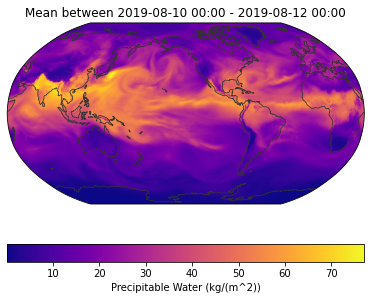

In [33]:
VAR = ds.prw.sel(time=slice(time_str1, time_str2))
VAR_avg = VAR.mean(dim='time')
im = egh.healpix_show(VAR_avg, cmap='plasma')
time_str1 = ds.time.min().dt.strftime('%Y-%m-%d %H:%M').item()
time_str2 = ds.time.max().dt.strftime('%Y-%m-%d %H:%M').item()
plt.title(f'Mean between {time_str1} - {time_str2}')
plt.colorbar(im, orientation='horizontal', label=f'Precipitable Water ({ds.prw.attrs["units"]})')